In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Function to Visualize the Clusters

def visualize_clusters(dataset, c_num, colors, name):
    #visulaizing the clusters
    for i in range(0, c_num):
        plt.scatter(dataset['x'][dataset['color'] == i],
                dataset['y'][dataset['color'] == i], s = 100,
                c = colors[i], label = f'Cluster {i+1}')

    plt.title(f'Clusters of {name} Dataset ({c_num} colors)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [ ]:
basic1 = pd.read_csv('/content/drive/MyDrive/DataSets/Ejercicios/KNN guia/pokemon.csv')

In [ ]:
basic1.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,...,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,...,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,...,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


In [ ]:
basic1['type'].unique()

array(["['Grass', 'Poison']", "['Fire']", "['Fire', 'Flying']",
       "['Water']", "['Bug']", "['Bug', 'Flying']", "['Bug', 'Poison']",
       "['Normal', 'Flying']", "['Dark', 'Normal']", "['Poison']",
       "['Electric']", "['Electric', 'Psychic']", "['Ice', 'Steel']",
       "['Poison', 'Ground']", "['Fairy']", "['Ice']", "['Ice', 'Fairy']",
       "['Normal', 'Fairy']", "['Poison', 'Flying']", "['Bug', 'Grass']",
       "['Ground', 'Steel']", "['Dark']", "['Fighting']",
       "['Fire', 'Rock']", "['Water', 'Fighting']", "['Psychic']",
       "['Water', 'Poison']", "['Rock', 'Electric']",
       "['Psychic', 'Fairy']", "['Water', 'Psychic']",
       "['Electric', 'Steel']", "['Water', 'Ice']", "['Poison', 'Dark']",
       "['Ghost', 'Poison']", "['Rock', 'Ground']",
       "['Electric', 'Grass']", "['Grass', 'Psychic']",
       "['Grass', 'Dragon']", "['Ground']", "['Fire', 'Ghost']",
       "['Normal']", "['Poison', 'Fairy']", "['Ground', 'Rock']",
       "['Grass']", "['Ice', '

In [ ]:
import pandas as pd

# Cargar el archivo de Pokémon
pokemon_data = pd.read_csv('/content/drive/MyDrive/DataSets/Ejercicios/KNN guia/pokemon.csv')

# Extraer el primer tipo y asignar identificadores
pokemon_data['primary_type'] = pokemon_data['type'].apply(lambda x: eval(x)[0] if isinstance(x, str) else 'Unknown')
unique_types = pokemon_data['primary_type'].unique()
type_mapping = {type_name: idx for idx, type_name in enumerate(unique_types)}
pokemon_data['type_id'] = pokemon_data['primary_type'].map(type_mapping)

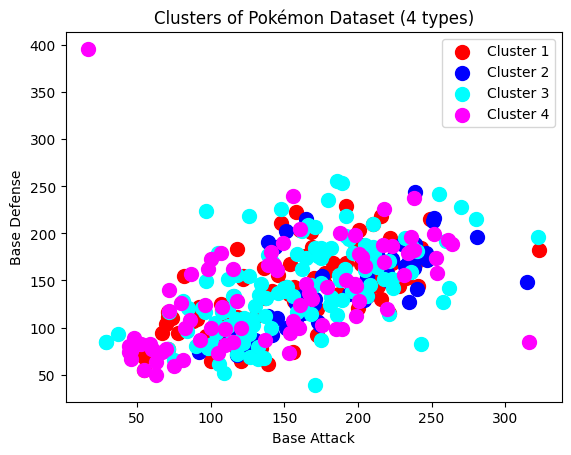

In [ ]:
import matplotlib.pyplot as plt

# Definir la función para visualizar clusters
def visualize_clusters(dataset, c_num, colors, name):
    for i in range(0, c_num):
        plt.scatter(dataset['base_attack'][dataset['type_id'] == i],
                    dataset['base_defense'][dataset['type_id'] == i],
                    s=100, c=colors[i], label=f'Cluster {i+1}')

    plt.title(f'Clusters of {name} Dataset ({c_num} types)')
    plt.xlabel('Base Attack')
    plt.ylabel('Base Defense')
    plt.legend()
    plt.show()

# Llamar a la función con el dataset procesado
visualize_clusters(pokemon_data, 4, ['red', 'blue', 'cyan', 'magenta'], 'Pokémon')


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Eliminar filas con NaN
numeric_columns = numeric_columns.dropna()

# Realizar el ajuste y predicción
y_kmeans_basic1 = kmeans_basic1.fit_predict(numeric_columns)

# Asignar los clusters al dataset original en las filas restantes
basic_1_1 = basic_1_1.loc[numeric_columns.index]
basic_1_1['color'] = y_kmeans_basic1


In [ ]:
basic_1_1['color'].unique()

array([3, 0, 1, 2], dtype=int32)

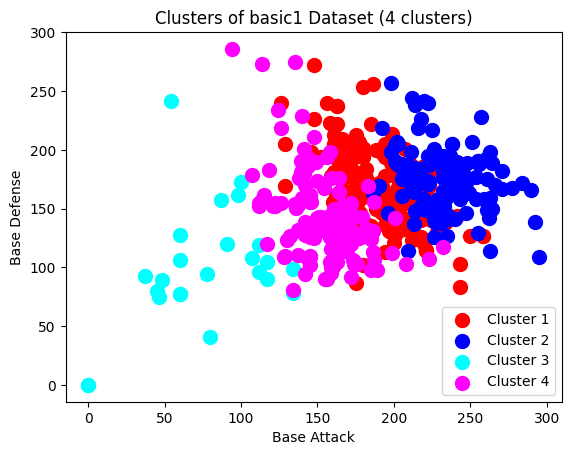

In [ ]:
# Actualizar la función visualize_clusters para usar la columna 'color'
def visualize_clusters(dataset, c_num, colors, name):
    for i in range(0, c_num):
        plt.scatter(dataset['base_attack'][dataset['color'] == i],
                    dataset['base_defense'][dataset['color'] == i],
                    s=100, c=colors[i], label=f'Cluster {i+1}')

    plt.title(f'Clusters of {name} Dataset ({c_num} clusters)')
    plt.xlabel('Base Attack')
    plt.ylabel('Base Defense')
    plt.legend()
    plt.show()

# Llamar a la función con el dataset procesado
visualize_clusters(basic_1_1, 4, ['red', 'blue', 'cyan', 'magenta'], 'basic1')


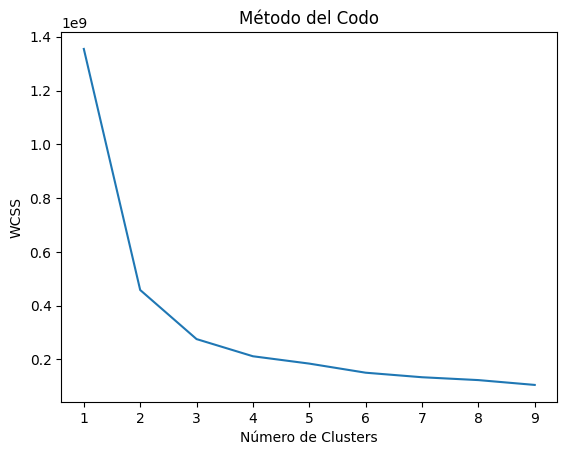

In [ ]:
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Seleccionar solo las columnas numéricas y rellenar los NaN
imputer = SimpleImputer(strategy='mean')
numeric_columns = basic1_1.select_dtypes(include=[np.number])
numeric_columns_imputed = imputer.fit_transform(numeric_columns)

# Lista para almacenar el WCSS
wcss = []

# Cálculo del WCSS para un rango de 1 a 10 clusters
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=300, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(numeric_columns_imputed)
    wcss.append(kmeans.inertia_)

# Graficar el "Codo de Jambu"
plt.plot(range(1, 10), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


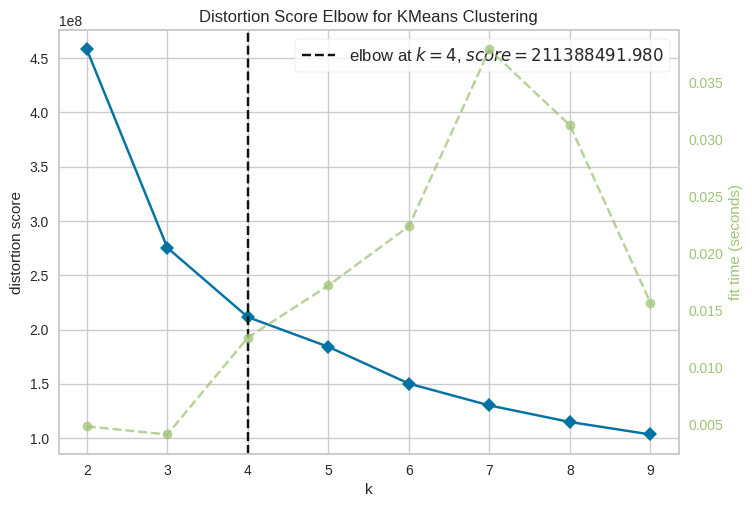

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [ ]:
from yellowbrick.cluster import kelbow_visualizer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np

# Seleccionar solo las columnas numéricas
numeric_columns = basic1_1.select_dtypes(include=[np.number])

# Imputar los valores NaN con la media de cada columna
imputer = SimpleImputer(strategy='mean')
numeric_columns_imputed = imputer.fit_transform(numeric_columns)

# Visualizar el método del codo con kelbow_visualizer
kelbow_visualizer(KMeans(random_state=4), numeric_columns_imputed, k=(2,10))
